# Visualizing ChIP-seq read coverage across NFKB binding intervals

While NFKB binds to the TSSs of protein coding genes, it also binds to
many intergenic regions of the genome. In addition to meta-gene
profiles we may also want to know the chromatin state at which NFKB
binding occurs. For example, we can integrate additional histone
modification ChIP-seq data from the ENCODE project. H3K4me3 and
H3K4me1 mark promoters and enhancers, respectively. We would like to
visualise the profile of these marks at all the genomic locations of
NFKB binding.

For this example we require three files:

* A file containing :term:`bed` intervals describing NFKB peaks
  (`NFKB.bed`), which may either be downloaded directly or created from
  the earlier :term:`bam` file of NFKB ChIP-seq reads using a peak
  caller such as MACS.

  * wget http://www.cgat.org/downloads/cgat/recipes/nfkb.bed.gz

* files containing aligned H3K4me1 and H3K4me3 ChIP-seq reads in
:term:`bam` format (H3K4me3.bam_, H3K4me1.bam_)

  * wget http://www.cgat.org/downloads/cgat/recipes/H3K4me3.bam
  * wget http://www.cgat.org/downloads/cgat/recipes/H3K4me1.bam

Using the CGAT tool ``bam2peakshape`` it is possible to produce a matrix
depicting read coverage across all intervals in the supplied
:term:`bed` file.

The following command line statement

1) finds the peak of H3K4me3 read coverage within each interval

2) calculates coverage across a 1000bp window centered around this peak

3) outputs a matrix in which intervals are ranked by peak height.

4) outputs an equivalent matrix depicting H3K4me1 coverage across the same windows.


In [2]:
!cgat bam2peakshape \
    --control-bam=H3K4me1.bam \
    --force-output \
    --sort-order=peak-height \
    --output-filename-pattern=peakshape.%s \
    H3K4me3.bam \
    nfkb.bed.gz \
    > peakshape.table


Two files are produced named peakshape.matrix_peak_height.gz &
peakshape.control_peak_height.gz that contain matrices depicting
H3K4me3 coverage and H3K4me1 coverage across intervals, respectively.

Both matrices are amenable to plotting as heatmaps using the R package gplots.
We begin with plotting the H3K4me3 data.

In [6]:
%load_ext rpy2.ipython
%R library(gplots)
%R library(RColorBrewer)
%R me3 = read.csv("peakshape.matrix_H3K4me3_peak_height.gz", header=TRUE, sep="\t")
%R me3$name=NULL
%R print(me3[1:10,1:10])


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


   X.985 X.975 X.965 X.955 X.945 X.935 X.925 X.915 X.905 X.895
1      0     0     0     0     0     0     0     0     0     0
2      0     0     0     0     0     0     0     0     0     0
3      0     0     0     0     0     0     0     0     0     0
4      0     0     0     0     0     0     0     0     0     0
5      0     0     0     0     0     0     0     0     0     0
6      0     0     0     0     0     0     0     0     0     0
7      0     0     0     0     0     0     0     0     0     0
8      0     0     0     0     0     0     0     0     0     0
9     20     8     0     0     0     0     0     0     0     0
10     0     0     0     0     0     0     0     0     0     0


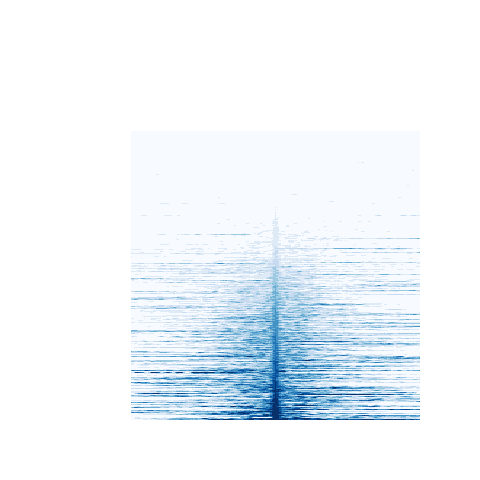

In [8]:
%R me3_matrix = as.matrix(me3)
# A proportion of NFkB intervals have no discernable H3K4me3 or H3K4me1 coverage.
# These areremoved before plotting.
%R me3_matrix = me3_matrix[seq(4000, 14906),]
# the remainder are plotted
%R cols=brewer.pal(9, "Blues")
%R heatmap.2(me3_matrix, col=cols, Rowv=F, Colv=F, labRow="", key=FALSE, labCol="", trace="none", dendrogram="none", breaks=seq(0, 1000, 101));

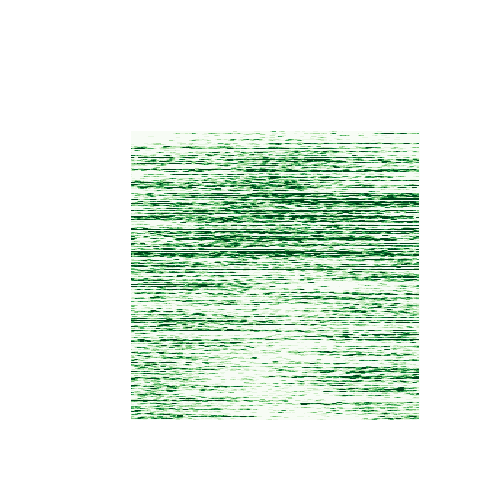

In [9]:
%R me1 = read.csv("peakshape.matrix_H3K4me1_peak_height.gz", header=T, sep="\t")
%R me1$name=NULL
%R me1_matrix = as.matrix(me1)
%R me1_matrix = me1_matrix[seq(4000, 14906),]
%R cols = brewer.pal(9, "Greens")
%R heatmap.2(me1_matrix, col=cols, Rowv=F, Colv=F, labRow="", key=FALSE, labCol="", trace="none", dendrogram="none", breaks=seq(0, 100, 11));

The resulting plots indicate that a subset of NFKB binding intervals
may be characterised on the basis of their chromatin state.